**Titanic data Ingestion ,Missing Values, Outliers**

Import Libraies :-

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
file_path=r"https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv"
data=pd.read_csv(file_path)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


EDA (exploratary Data Analysis)

In [3]:
data.drop(columns='PassengerId',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [4]:
data .describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Missing values analysis
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Age , cabin , Embark has 177 , 687 , 2 missing values respectively 

In [6]:
numeric_col=[col for col in data.columns if data[col].dtype !="object"]
categorical_col=[col for col in data.columns if data[col].dtype =="object"]

print(f"Numeric COlumns : {numeric_col}")
print(f"Categorical COlumns : {categorical_col}")

Numeric COlumns : ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical COlumns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


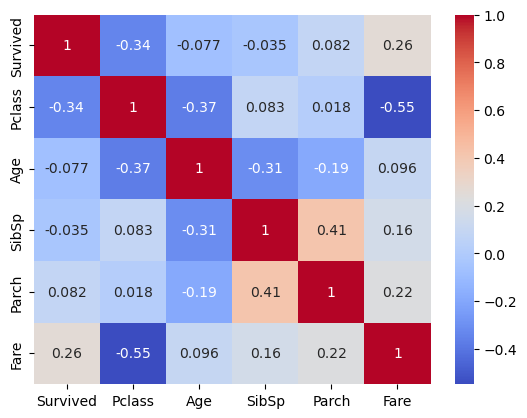

In [7]:
sns.heatmap(data[numeric_col].corr(), annot=True, cmap='coolwarm')
plt.show()

In [8]:
data.groupby('Sex')['Fare'].mean()


Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

In [9]:
data.groupby('Survived')['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

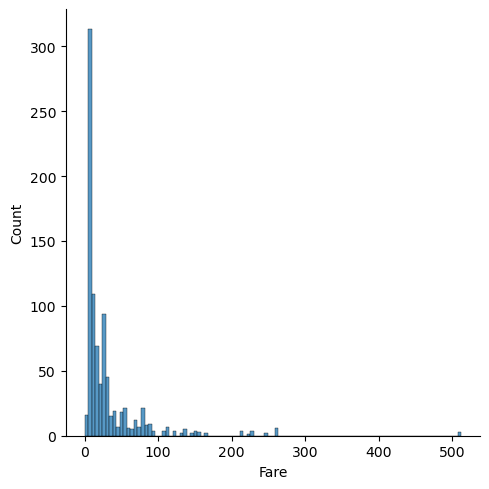

In [10]:
sns.displot(data['Fare'])

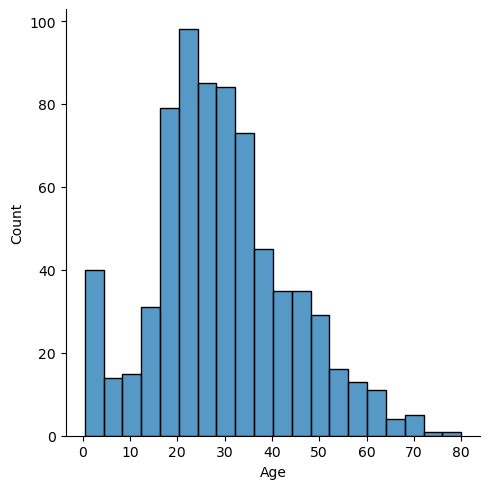

In [11]:
sns.displot(data['Age'])

In [12]:
from sklearn.impute import SimpleImputer

numeric_imputer=SimpleImputer(strategy='mean')
categorical_imputer=SimpleImputer(strategy='most_frequent')

# reshape to convert in 2D and ravel it to make again in 1D
data['Age']=numeric_imputer.fit_transform(np.array(data['Age']).reshape(-1,1)).ravel() 
data['Embarked']=categorical_imputer.fit_transform(np.array(data['Embarked']).reshape(-1,1)).ravel()
data['Cabin']=categorical_imputer.fit_transform(np.array(data['Cabin']).reshape(-1,1)).ravel()

In [13]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [15]:
dest_path=r"C:\Users\Administrator\OneDrive\Desktop\Machine_learning_cs303\Practicals\Experiment_3\Dataset\data.csv"

data.to_csv(dest_path,index=False)